In [1]:
from sklearn.datasets import load_iris,make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from my_dbscan import *
from my_kmeans import *
import pandas as pd
import numpy as np

# Load Dataset: Iris and Abalone 

In [2]:
iris = load_iris()
iris_data = pd.read_csv('./data/iris.csv')
abalone = pd.read_csv("./data/abalone.csv")
ab_label = abalone.values[:,0]
ab_data = pd.DataFrame(abalone.values[:,0:])
g_dum = pd.get_dummies(ab_data[0])
ab_data = ab_data.drop(ab_data.columns[0],axis = 1)
ab_one_hot_data = pd.concat([ab_data, g_dum], axis = 1)

# Iris: MyKmeans V.S. Scikit-Learn Kmeans

In [3]:
k = 3
my_label = my_kmeans(k,iris_data)           #my kmeans function, iteration = 30, kmeans++ initialization
kmeans = KMeans(n_clusters = k)                     #scikit learn function
kmeans.fit(iris.data)      
print("\n\nSklearn Label:\n",kmeans.labels_)
print("\n\nMy Accuracy: ",accuracy(my_label))
print("\n\nSklearn Accuracy: ",accuracy(kmeans.labels_) )

Centroids:
 [[5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999], [6.8500000000000005, 3.073684210526315, 5.742105263157893, 2.0710526315789473], [5.901612903225807, 2.748387096774194, 4.393548387096775, 1.4338709677419357]]

Converge at  3  iterations

My label:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Sklearn Label:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


My Accuracy:  0.8933333333333333


Sklearn Accuracy:  0.8933333333333333


# Plot Kmeans Iris

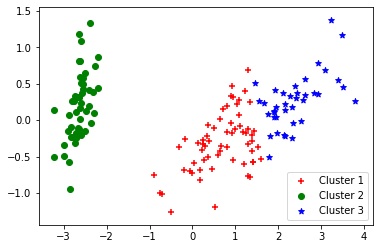

In [4]:
#decrease dimension for plot
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

# Plot Kmeans Abalone

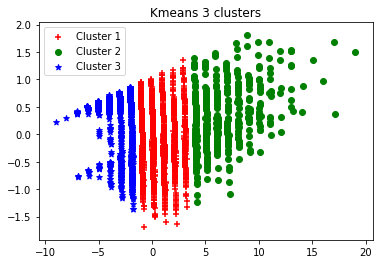

In [5]:
#decrease dimension for plot
kmeans.fit(ab_data)   
pca = PCA(n_components=2).fit(ab_one_hot_data)
pca_2d = pca.transform(ab_one_hot_data)
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('Kmeans 3 clusters')
plt.show()

# Kmeans Silhouette Score

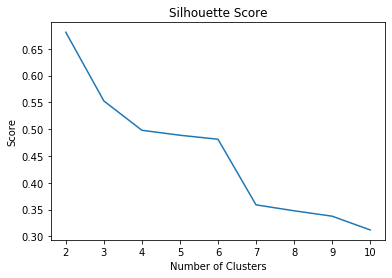

In [6]:
k = range(2, 11)
kmeans = [KMeans(n_clusters=i) for i in k]
score = []
for i in range(len(kmeans)):
    label = kmeans[i].fit(iris.data).labels_
    score.append(metrics.silhouette_score(iris.data, label))
plt.plot(k,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Score')
plt.show()

# Iris: MyDBSCAN V.S. Scikit-Learn DBSCAN

In [7]:
#check if mydbscan label is as same as library

dbscan = DBSCAN(eps=0.6,min_samples=6).fit(iris.data)
my_db = my_dbscan(iris.data,0.6,6) 
my_d = []
sk_d = []
for i in range(-1,3):
    my_d.append(my_db.count(i))
    sk_d.append(dbscan.labels_.tolist().count(i))
print("Scikit Learn DBSCAN label:"+str(sk_d))
print("         My DBSCAN label:"+str(my_d))

Scikit Learn DBSCAN label:[11, 49, 90, 0]
         My DBSCAN label:[11, 49, 90, 0]


# Plot DBSCAN Iris

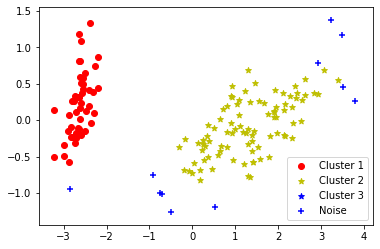

In [8]:
#decrease dimension for plot
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if my_db[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='o')
    elif my_db[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='*')
    elif my_db[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='<')
    elif my_db[i] == -1:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='+')

plt.legend([c1, c2, c3, c4 ], ['Cluster 1', 'Cluster 2', 'Cluster 3','Noise'])
plt.show()

# Plot DBSCAN Abalone

col_0  -1    0    1    2    3    4    5    6    7    8    9    10   11   12  \
row_0                                                                         
F       62   41   43  236  247  121   25    9   51  197  124   15   87    4   
I       12   10  267  173   92  274    7    1   14   62   21    2   24   98   
M       60   50   80  276  292  170   28   10   52  223  112   13   85   11   

col_0   13   14   15   16   17  
row_0                           
F        0   14    7   24    0  
I       51  214    1    7   12  
M        6   27   10   20    3  


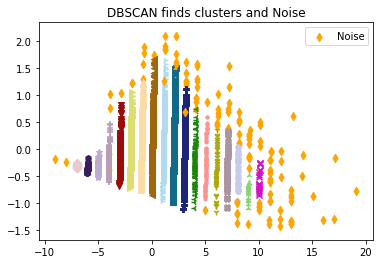

In [9]:
dbscan = DBSCAN(eps=0.2,min_samples=8).fit(ab_data)
a = pd.crosstab(ab_label,dbscan.labels_)
print(a)

#decrease dimension for plot
pca = PCA(n_components=2).fit(ab_data)
pca_2d = pca.transform(ab_data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#FD9390', marker='.')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#980D09', marker='v')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#FDDBA7', marker='^')
    elif dbscan.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#A0660E', marker='<')
    elif dbscan.labels_[i] == 4:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#DDDE72', marker='>')
    elif dbscan.labels_[i] == 5:
        c6 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#A8A90E', marker='1')
    elif dbscan.labels_[i] == 6:
        c7 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#83D474', marker='2')
    elif dbscan.labels_[i] == 7:
        c8 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#1C8609', marker='3')
    elif dbscan.labels_[i] == 8:
        c9 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#AEDCEC', marker='4')
    elif dbscan.labels_[i] == 9:
        c10 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#106A88', marker='s')
    elif dbscan.labels_[i] == 10:
        c11 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#C8CBEC', marker='p')
    elif dbscan.labels_[i] == 11:
        c12 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#1D2577', marker='P')
    elif dbscan.labels_[i] == 12:
        c13 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#BCABD3', marker='*')
    elif dbscan.labels_[i] == 13:
        c14 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#381D5F', marker='h')
    elif dbscan.labels_[i] == 14:
        c15 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#B99CB7', marker='+')
    elif dbscan.labels_[i] == 15:
        c16 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#D410C8', marker='x')
    elif dbscan.labels_[i] == 16:
        c17 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#A9949F', marker='X')
    elif dbscan.labels_[i] == 17:
        c18 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#E9CBCF', marker='D')
    elif dbscan.labels_[i] == -1:
        c19 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='#FFA500', marker='d')
#plt.legend([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19], ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7', 'Cluster 8','Cluster 9','Cluster 10','Cluster 11','Cluster 12','Cluster 13', 'Cluster 14','Cluster 15','Cluster 16','Cluster 17','Cluster 18','Noise'])
plt.legend([c19],['Noise'])
plt.title('DBSCAN finds clusters and Noise')
plt.show()

# Choose Parameter for DBSCAN from Silhouette Score

In [10]:
minpts = range(3, 9)
epsilon = [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
max_score = 0
best_eps = 0
best_pts = 0
for i in minpts:
    for j in epsilon:
        label = my_dbscan(iris.data,j,i)
        score = metrics.silhouette_score(iris.data, label)
        if score > max_score:
            max_score = score
            best_eps = j
            best_pts = i
        print("minpts = ",i," epsilon = ",j," score = ",score)
print("best_result: ","epsilon = ",best_eps," minpts= ",best_pts)

minpts =  3  epsilon =  0.2  score =  -0.343529574246
minpts =  3  epsilon =  0.25  score =  -0.0887156387822726
minpts =  3  epsilon =  0.3  score =  0.03169672127881435
minpts =  3  epsilon =  0.35  score =  0.1887839479338409
minpts =  3  epsilon =  0.4  score =  0.3349357629247672
minpts =  3  epsilon =  0.45  score =  0.3343839295541957
minpts =  3  epsilon =  0.5  score =  0.34673727351549793
minpts =  3  epsilon =  0.55  score =  0.4028184679970043
minpts =  3  epsilon =  0.6  score =  0.42300259179079075
minpts =  3  epsilon =  0.65  score =  0.501833562046431
minpts =  3  epsilon =  0.7  score =  0.501833562046431
minpts =  4  epsilon =  0.2  score =  -0.3298054383391399
minpts =  4  epsilon =  0.25  score =  -0.21766177382837257
minpts =  4  epsilon =  0.3  score =  -0.04646912371526587
minpts =  4  epsilon =  0.35  score =  0.15521858130436417
minpts =  4  epsilon =  0.4  score =  0.32525548084540423
minpts =  4  epsilon =  0.45  score =  0.3724439898969612
minpts =  4  epsi

# Kmeans vs DBSCAN

In [11]:
X, label = make_moons(n_samples=200, noise=0.1)
km = KMeans(n_clusters = 2).fit(X)
db = DBSCAN(eps=0.25, min_samples=10).fit(X)

# Kmeans

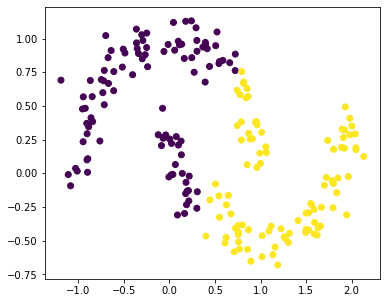

In [12]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(X[:,0], X[:,1], c = km.labels_)

# DBSCAN

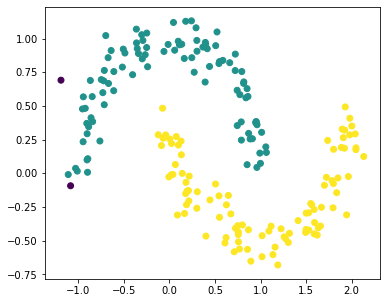

In [13]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(X[:,0], X[:,1], c = db.labels_)